In [1]:
# import pysam/
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
# from adjustText import adjust_text

In [2]:
mhc_race_positions_dict={'ACB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'All':{'mhc':[[29720403, 30048796],[30994370, 31528792],[32212726, 32882258]]},
 'ASW': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'BEB': {'mhc': [[29720403, 30048796],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CDX': {'mhc': [[30994370, 31528792], [32212726, 32923168]]},
 'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'CHB': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CHS': {'mhc': [[30994370, 31528792], [32397207, 32882258]]},
 'CLM': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ESN': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32882258]]},
 'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GIH': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'GWD': {'mhc': [[29720403, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'IBS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ITU': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'JPT': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'KHV': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32923168]]},
 'LWK': {'mhc': [[29720403, 30011739],
   [31052133, 31528792],
   [32212726, 32923168]]},
 'MSL': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'MXL': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'PEL': {'mhc': [[29720403, 29896285],
   [30959575, 31528792],
   [32288923, 32882258]]},
 'PJL': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'PUR': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'STU': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'TSI': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'YRI': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]}}

In [3]:
df_all_mhc=pd.read_csv("sim_posmhc.csv")
df_all_mhc

,Unnamed: 0,P0,P1,P00,P11,P
0,29720403,0.816740,0.383260,0.601811,0.059963,-0.166884
1,29720508,0.900562,0.299438,0.771081,0.019675,-0.099219
2,29720509,0.999750,0.200250,0.999375,0.000000,-0.000180
3,29720635,0.998876,0.201124,0.997189,0.000000,-0.000813
4,29720654,0.999750,0.200250,0.999375,0.000000,-0.000180
...,...,...,...,...,...,...
108906,33129837,0.753279,0.446721,0.494379,0.111181,-0.192122
108907,33129865,0.998126,0.201874,0.995315,0.000000,-0.001356
108908,33129951,0.999750,0.200250,0.999375,0.000000,-0.000180
108909,33129973,0.994379,0.205621,0.986259,0.000312,-0.005857


In [4]:
df_race_mhc=pd.read_csv("sim_mhc.csv")
df_race_mhc            

,Unnamed: 0,ACB,ASW,BEB,CDX,CEU,CHB,CHS,CLM,ESN,...,KHV,LWK,MSL,MXL,PEL,PJL,PUR,STU,TSI,YRI
0,29720403,-0.180304,-0.129363,-0.163600,-0.237663,-0.085627,-0.191569,-0.176254,-0.080478,-0.219198,...,-0.191735,-0.195120,-0.213656,-0.136539,-0.118236,-0.214122,-0.168496,-0.211674,-0.102245,-0.182509
1,29720508,-0.136938,-0.096810,-0.084045,-0.044053,-0.025552,-0.073478,-0.036249,-0.037797,-0.166799,...,-0.155916,-0.133552,-0.157263,-0.079445,-0.062938,-0.109505,-0.084166,-0.106913,-0.041026,-0.167668
2,29720509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,29720635,-0.005034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009953
4,29720654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108906,33129837,-0.171996,-0.151259,-0.144859,-0.158128,-0.272878,-0.215919,-0.136453,-0.173686,-0.200193,...,-0.270061,-0.183102,-0.148575,-0.225743,-0.070643,-0.242686,-0.188703,-0.264461,-0.271183,-0.132960
108907,33129865,0.000000,0.000000,-0.006713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.009675,0.000000,0.000000,0.000000,0.000000,-0.014290,0.000000,-0.002547,0.000000,0.000000
108908,33129951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003990,0.000000,0.000000,0.000000,0.000000
108909,33129973,-0.002502,0.000000,-0.006713,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007890,...,-0.009675,0.000000,-0.053859,0.000000,0.000000,-0.014290,0.000000,-0.002547,0.000000,-0.003267


In [5]:
fileName = '1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [6]:
MHC_genes={'HLA-A': [29942532,  29945870],
 'HLA-B': [31353875, 31357179],
 'HLA-C': [31268749, 31272092],
 'HLA-DRA1': [32439887,32445046],
 'HLA-DRB1': [32578775,32589848],
 'HLA-DQA1': [32637406,32655272],
 'HLA-DQB1': [32659467,32666657],
 'HLA-DPA1': [33064569,33080748],
 'HLA-DPB1': [33075990,33089696],
 'HLA-BF': [31946095, 31952084],
 'HLA-C2': [31897783, 31945672],
 'HLA-C4A': [31982057, 32002681],
 'HLA-C4B': [32014795, 32035418],
 'HLA-DMA': [32948618, 32953097],
 'HLA-DMB': [32934636, 32941028],
 'HLA-DOA': [33004182, 33009591],
 'HLA-DOB': [32812763, 32817002],
 'HLA-DPB2': [33112516, 33129113],
 'HLA-E': [30489509, 30494194],
 'HLA-F': [29723434, 29738532],
 'HLA-G': [29826474, 29831021],
 'HLA-HSPA1A': [31815543, 31817942],
 'HLA-HSPA1B': [31827738, 31830254],
 'HLA-HSPA1L': [31809619, 31815283],
 'HLA-LTA': [31560610, 31574324],
 'HLA-LTB': [31580558, 31582425],
 'HLA-TNF': [31575565, 31578336],
 'HLA-DRB9':[32459820,32460089],
 'HLA-DRB5':[32517353, 32530287],
 'HLA-DRB6':[32552713,32560002],
 'RNU1-61P':[32549940,32550090],
 'HLA-DQA1-AS1':[32634991,32641310],
 'HLA-DQB1-AS1':[32659880,32660729],
 'MTCO3P1':[32706144,32706803],
 'OR4K6P':[19847267,19848329],
 'OR4K2':[19875142,19883932],
 'OR4K3':[19868197,19869173],
 'LOC124903278':[19902461,19948734],
 'OR4K4P':[19905712,19906644],
 'OR4K1':[19920263,19936757],
 'OR4K5':[19920607,19921578],
 'LOC100421751':[19907999,19908645],
 'OR4K16P':[19956547,19957554],
 'POT1':[124822386,124929825],
 'EEF1GP1':[125033433,125035383],
 'MAST2':[45803612,46036122],
'TMA16P2':[45845343,45847719],
'LOC105378694':[45867884,45909234],
'LOC124904171':[46052229,46053929] 
 }

In [7]:
def judge_gene_membership_region(mhc_regions,HLA_regions):
    resultdict=dict()
    for race, dic in mhc_regions.items():
        if dic!={}:
            resultdict[race]=dict()
            for arr in dic["mhc"]:
                resultdict[race][tuple(arr)]=[]
                for gene_name,region in HLA_regions.items():
                    if region[0]>=arr[0] and region[1]<=arr[1]:
                        resultdict[race][tuple(arr)].append(gene_name)
    return resultdict


In [8]:
resultdict=judge_gene_membership_region(mhc_race_positions_dict,MHC_genes)#{race:{arr:[HLA,HLB]}}

In [9]:
resultdict

{'ACB': {(29720403, 30011739): ['HLA-A', 'HLA-F', 'HLA-G'],
  (30994370, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {(29720403, 30048796): ['HLA-A', 'HLA-F', 'HLA-G'],
  (30994370, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {(29720403, 29913914): ['HLA-F', 'HLA-G'],
  (29939668, 30120966): ['HLA-A'],
  (31052133, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'BEB': {(29720403, 30048796): [

In [10]:
allrecords=[]
for race,regiondict in resultdict.items():
    record=[]


In [11]:
resultdict_enen=dict()
for race,regiondict in resultdict.items():
    resultdict_enen[race]=dict()
    for region,genenames in regiondict.items():
        resultdict_enen[race][np.mean(region)]=genenames
resultdict_enen

{'ACB': {29866071.0: ['HLA-A', 'HLA-F', 'HLA-G'],
  31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {29884599.5: ['HLA-A', 'HLA-F', 'HLA-G'],
  31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {29817158.5: ['HLA-F', 'HLA-G'],
  30030317.0: ['HLA-A'],
  31290462.5: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'BEB': {29884599.5: ['HLA-A', 'HLA-F', 'HLA-G'],
  31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HL

In [12]:
countdict=dict()
for race, dic in resultdict.items():
    countdict[race]=dict()
    for region,gene_names in dic.items():
        countdict[race][region]=len(gene_names)
countdict

{'ACB': {(29720403, 30011739): 3,
  (30994370, 31528792): 2,
  (32212726, 32882258): 12},
 'All': {(29720403, 30048796): 3,
  (30994370, 31528792): 2,
  (32212726, 32882258): 12},
 'ASW': {(29720403, 29913914): 2,
  (29939668, 30120966): 1,
  (31052133, 31528792): 2,
  (32212726, 32882258): 12},
 'BEB': {(29720403, 30048796): 3,
  (30994370, 31528792): 2,
  (32212726, 32882258): 12},
 'CDX': {(30994370, 31528792): 2, (32212726, 32923168): 12},
 'CEU': {(30994370, 31528792): 2, (32212726, 32882258): 12},
 'CHB': {(29720403, 29913914): 2,
  (30994370, 31528792): 2,
  (32212726, 32882258): 12},
 'CHS': {(30994370, 31528792): 2, (32397207, 32882258): 12},
 'CLM': {(29720403, 29896285): 2,
  (30994370, 31528792): 2,
  (32212726, 32882258): 12},
 'ESN': {(29720403, 30120966): 3,
  (30994370, 31528792): 2,
  (32397207, 32882258): 12},
 'FIN': {(30994370, 31528792): 2, (32212726, 32882258): 12},
 'GBR': {(30994370, 31528792): 2, (32212726, 32882258): 12},
 'GIH': {(29720403, 29896285): 2,
  (3

In [13]:
def random_colors(num_colors):
    random_colors = []
    for _ in range(num_colors):
        random_color = list(np.random.rand(3)) 
        random_colors.append(random_color)
    return random_colors

num_colors = 27
color_list = random_colors(num_colors)

In [14]:
color_list

[[0.40415728805823536, 0.5796996166490807, 0.4000960258320131],
 [0.6644682649336225, 0.02989126652093388, 0.7070322995948388],
 [0.8785348054085628, 0.8463261013534725, 0.21781545815746084],
 [0.7893773135805133, 0.8662333311372796, 0.3847872521217217],
 [0.9209989848367897, 0.5193815644874051, 0.4929680913971449],
 [0.21532941573662756, 0.5314689248461936, 0.568579954431899],
 [0.8057103140940525, 0.07217167503528599, 0.5561515422296476],
 [0.6919537379459413, 0.9701184751659057, 0.33893096403532474],
 [0.7585768320381072, 0.25758476248793216, 0.005813714789149049],
 [0.943145621293488, 0.8262444538395427, 0.9051667612424085],
 [0.9829139379852728, 0.6702435669402794, 0.32754015283367555],
 [0.597987701707264, 0.905840500648228, 0.3315091047374684],
 [0.6897779779030069, 0.3480800039850672, 0.45523656398467804],
 [0.175843473472023, 0.4113962522854757, 0.7866738329057444],
 [0.7351324526517091, 0.3304566726439949, 0.14082006485124188],
 [0.10814082033087824, 0.9597352105046758, 0.752

In [15]:
zipped_color_list=dict(zip(allcategories,color_list))
zipped_color_list

{'ACB': [0.40415728805823536, 0.5796996166490807, 0.4000960258320131],
 'ASW': [0.6644682649336225, 0.02989126652093388, 0.7070322995948388],
 'All': [0.8785348054085628, 0.8463261013534725, 0.21781545815746084],
 'BEB': [0.7893773135805133, 0.8662333311372796, 0.3847872521217217],
 'CDX': [0.9209989848367897, 0.5193815644874051, 0.4929680913971449],
 'CEU': [0.21532941573662756, 0.5314689248461936, 0.568579954431899],
 'CHB': [0.8057103140940525, 0.07217167503528599, 0.5561515422296476],
 'CHS': [0.6919537379459413, 0.9701184751659057, 0.33893096403532474],
 'CLM': [0.7585768320381072, 0.25758476248793216, 0.005813714789149049],
 'ESN': [0.943145621293488, 0.8262444538395427, 0.9051667612424085],
 'FIN': [0.9829139379852728, 0.6702435669402794, 0.32754015283367555],
 'GBR': [0.597987701707264, 0.905840500648228, 0.3315091047374684],
 'GIH': [0.6897779779030069, 0.3480800039850672, 0.45523656398467804],
 'GWD': [0.175843473472023, 0.4113962522854757, 0.7866738329057444],
 'IBS': [0.735

In [16]:
sim_dict = {'HLA-A': 29944201.0,
 'HLA-B': 31355527.0,
 'HLA-C': 31270420.5,
 'HLA-DOB': 32814882.5,
 'HLA-DQA1': 32646339.0,
#  'HLA-DQA1-AS1': 32638150.5,
 'HLA-DQB1': 32663062.0,
#  'HLA-DQB1-AS1': 32660304.5,
 'HLA-DRA1': 32442466.5,
 'HLA-DRB1': 32584311.5,
 'HLA-DRB5': 32523820.0,
 'HLA-DRB6': 32556357.5,
 'HLA-DRB9': 32459954.5,
 'HLA-F': 29730983.0,
 'HLA-G': 29828747.5,
 'MTCO3P1': 32706473.5,
 'RNU1-61P': 32550015.0}

In [17]:
sort_arr = sorted(sim_dict.items(), key=lambda x:x[1])

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)

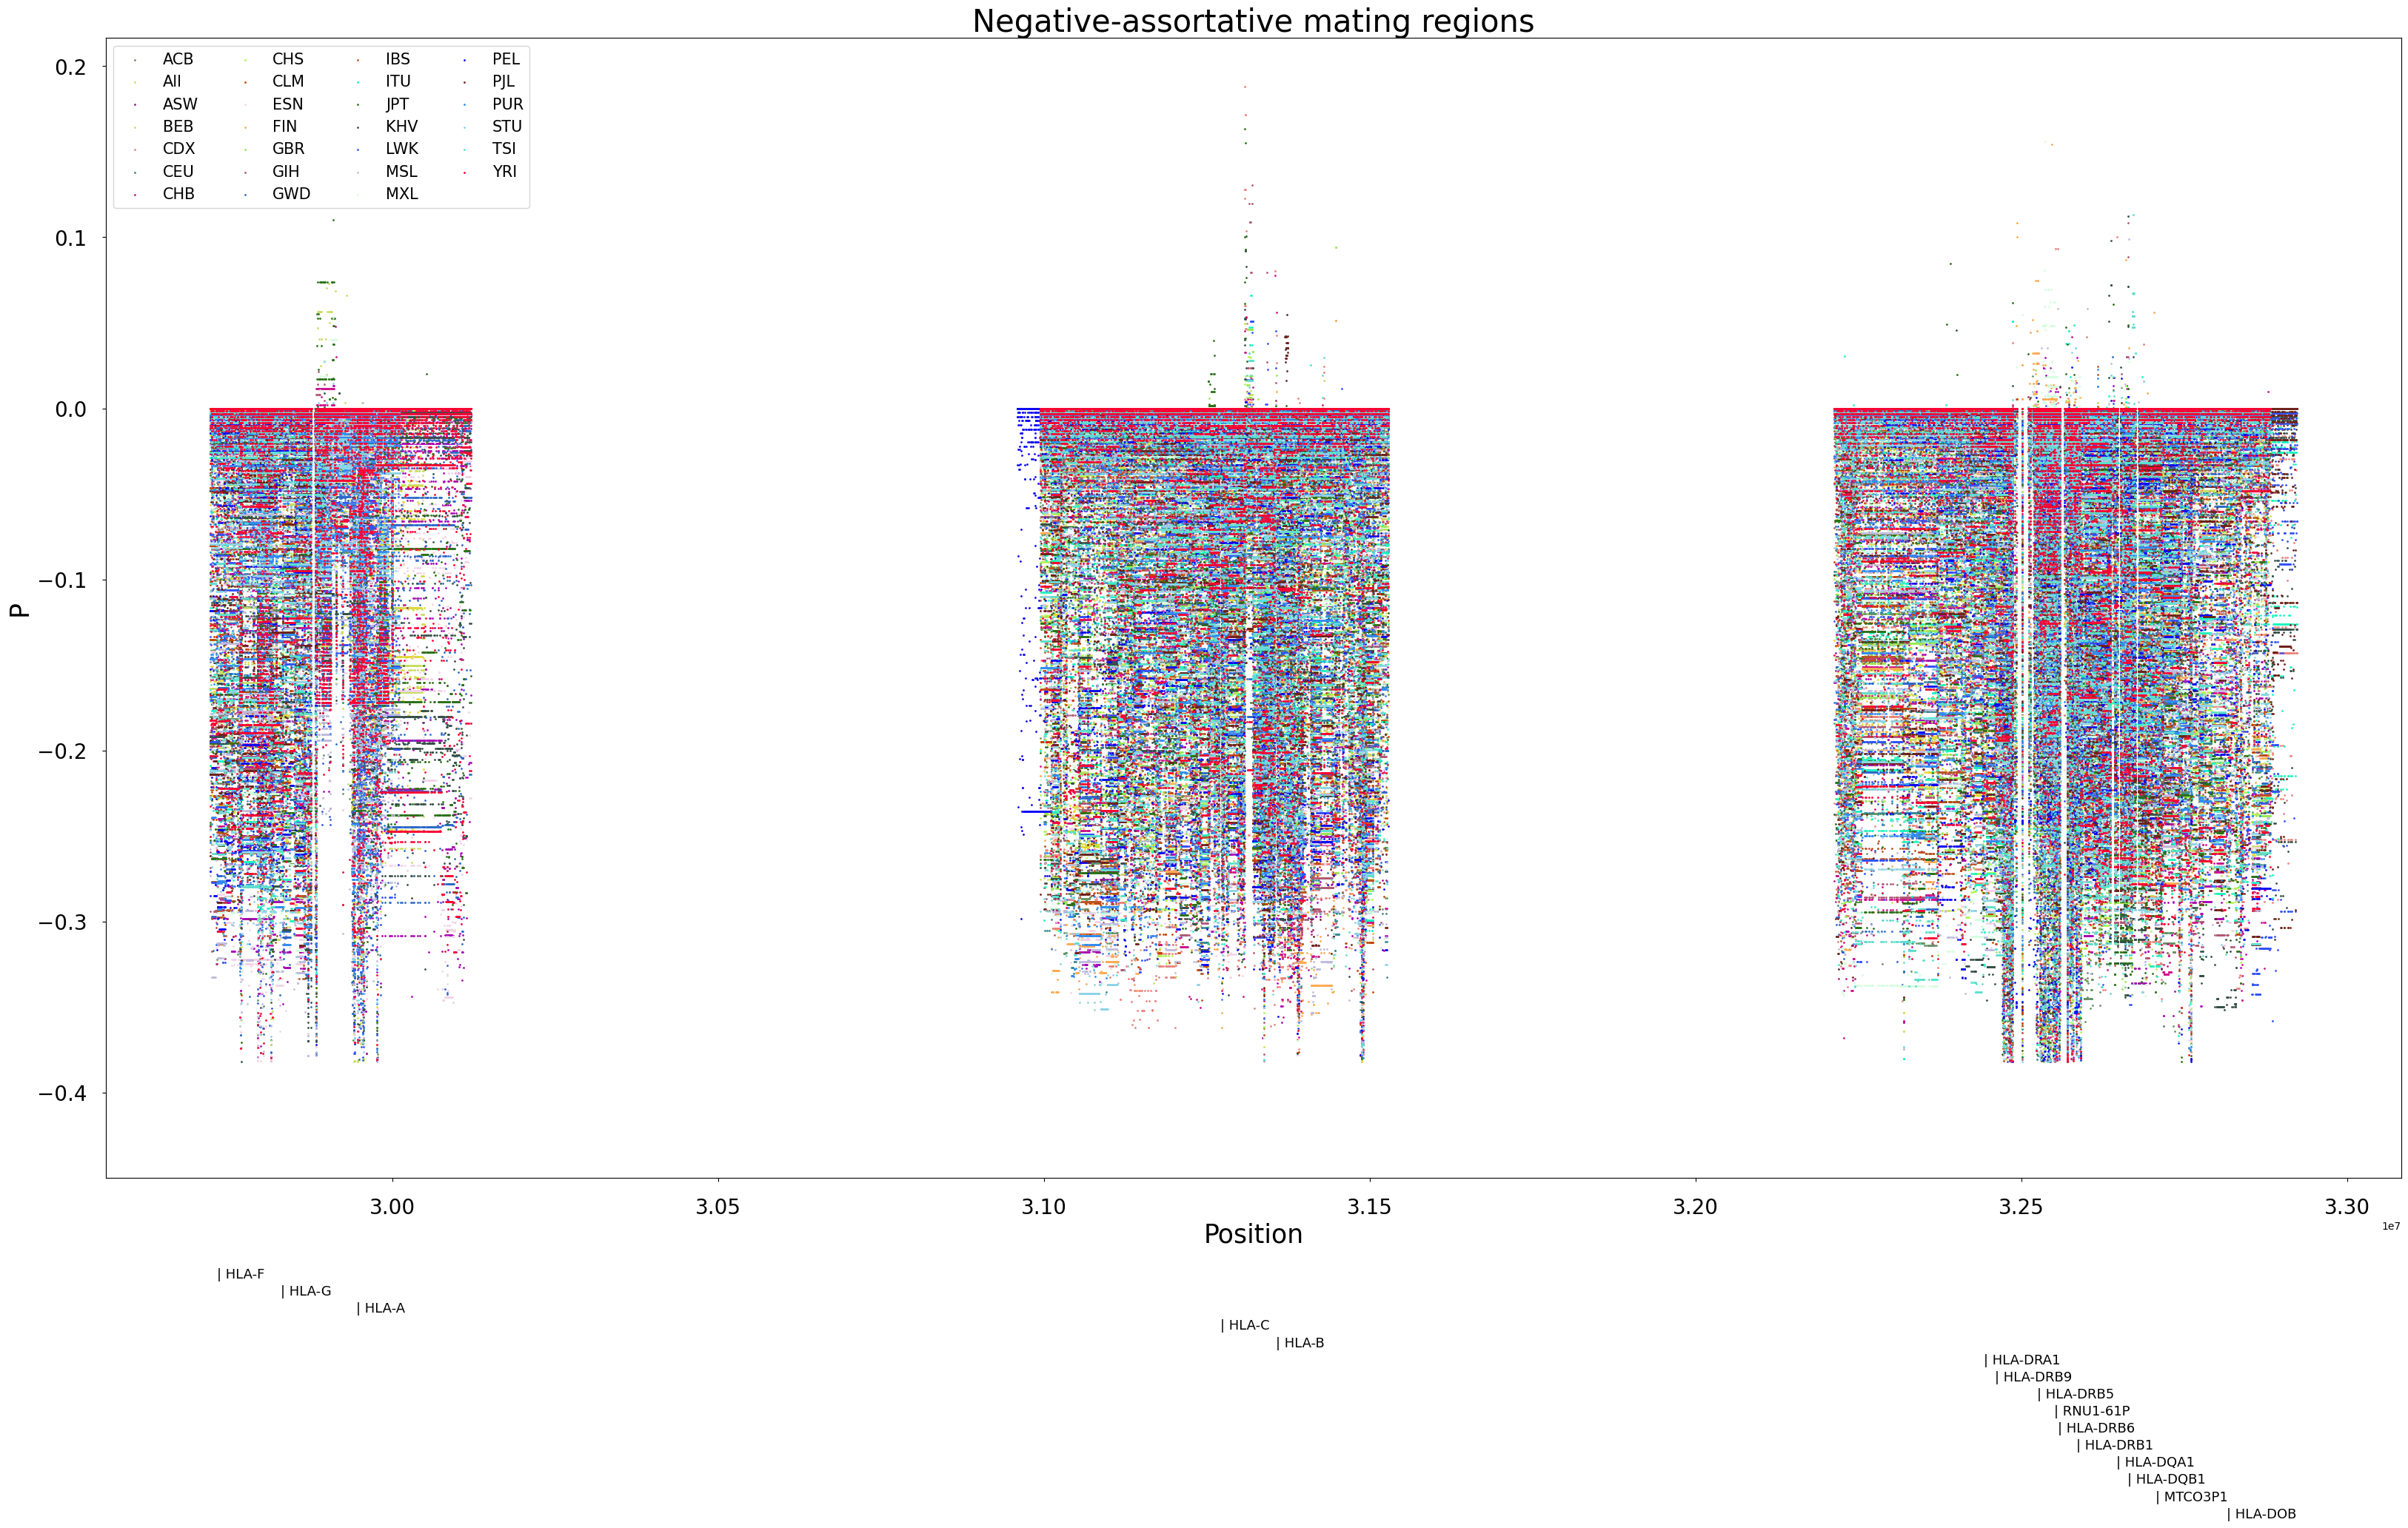

In [21]:
allpositions=[]
allPs=[]
seen_races=set()
for race, regiondict in mhc_race_positions_dict.items():
    if regiondict:
        if race=='All':
            for arr in regiondict["mhc"]:
                xvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list()
                allpositions+=xvalues
                yvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["P"].to_list()
                allPs+=yvalues
                #race_color_dict[race] = zipped_color_list[race] 
                plt.scatter(xvalues,yvalues,color=zipped_color_list[race],s=1)
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
        else:
            for arr in regiondict["mhc"]:
                xvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list()
                allpositions+=xvalues
                yvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])][race].to_list()
                allPs+=yvalues
                plt.scatter(xvalues,yvalues,color=zipped_color_list[race],s=1)        
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
                    
y_offset = -0.5
for x,y in sort_arr:
    # plt.vlines(x = sim_dict[x], ymin = y_offset-0.01, ymax = y_offset,
        #    colors = 'black')
    # plt.text(x = sim_dict[x]+5000, y = y_offset-0.0085, s=x, fontdict={'fontsize':13})
    plt.text(x = sim_dict[x], y = y_offset-0.0085, s="| "+x, fontdict={'fontsize':13})
    y_offset -= 0.01
plt.ylim(-0.45,None)
plt.tick_params(axis='both', which='major', labelsize=20,pad=15)  
 
plt.title("Negative-assortative mating regions",fontsize=30)
plt.xlabel("Position",fontsize=25)
plt.ylabel("P",fontsize=25)


plt.legend(loc="best",fontsize=15,ncol=4)
# plt.savefig("pic3.png",dpi=300) 
plt.savefig("pic3.pdf",dpi=300,bbox_inches = 'tight')
plt.show()      
